# **# Regression Analysis: BucketKart Sales Prediction Case Study**

**Context**
A sales forecast is a prediction of future sales revenue based on historical data, industry
trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate
weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to
make an accurate sales forecast as it adds value across an organization and helps the different
verticals to chalk out their future course of action.
Forecasting helps an organization plan its sales operations by region and provides
valuable insights to the supply chain team regarding the procurement of goods and materials. An
accurate sales forecast process has many benefits which include improved decision-making
about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce
the time spent in planning territory coverage and establish benchmarks that can be used to assess
trends in the future.


**Objectives**
BucketKart is an organization that owns a chain of supermarkets and food marts
providing a wide range of products. They want to predict the future sales revenue of its different
outlets so that they can strategize their sales operation across different tier cities and plan their
inventory accordingly.
To achieve this purpose, BucketKart has hired a data science firm, shared the sales
records of its various outlets for the previous quarter, and asked the firm to come up with a
suitable model to predict the total sales of the stores for the upcoming quarter.

**Data Description**
The data contains the different attributes of the various products and stores. The detailed data
dictionary is given below.
1. Product_Id - unique identifier of each product, each identifier having two letters at the
beginning followed by a number.
2. Product_Weight - the weight of each product
3. Product_Sugar_Content - sugar content of each product like low sugar, regular, and no
sugar
4. Product_Allocated_Area - the ratio of the allocated display area of each product to the
total display area of all the products in a store
5. Product_Type - broad category for each product like meat, snack foods, hard drinks,
dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen
foods, fruits and vegetables, household, seafood, starchy foods, others
6. Product_MRP - maximum retail price of each product
7. Store_Id - unique identifier of each store
8. Store_Establishment_Year - the year in which the store was established

9. Store_Size - the size of the store depending on sq. feet like high, medium, and low
10. Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier
2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively
higher than its Tier 2 and Tier 3 counterparts.
11. Store_Type - the type of store depending on the products that are being sold there like
Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
12. Product_Store_Sales_Total - total revenue generated by the sale of that particular product
in that particular store

# **Data Loading and Pre-Processing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Practical3/Copy of BucketKart.csv')

df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


Observations:
The DataFrame has 12 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [53]:
rows, columns = df.shape

print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 8763 rows and 12 columns.


Dataset has 8763 rows and 12 coloumns.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [33]:
df.nunique()

,0
Product_Id,8763
Product_Weight,1113
Product_Sugar_Content,4
Product_Allocated_Area,228
Product_Type,16
Product_MRP,6100
Store_Id,4
Store_Establishment_Year,4
Store_Size,3
Store_Location_City_Type,3


In [34]:
df.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


There is no null values in this dataset.

In [35]:
df.groupby(['Store_Type'])['Store_Type'].count()

,Store_Type
Store_Type,
Departmental Store,1349
Food Mart,1152
Supermarket Type1,1586
Supermarket Type2,4676


There are 4 store types [ Departmental Store: 1349, Food Mart: 1152, Supermarket Type1: 1586, Supermarket Type2: 4676]

In [55]:
# Numerical columns
numerical_cols = ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP']

# Categorical columns
categorical_cols = ['Product_Sugar_Content', 'Product_Type', 'Store_Size',
                    'Store_Location_City_Type', 'Store_Type']

# **Univariate Analysis**

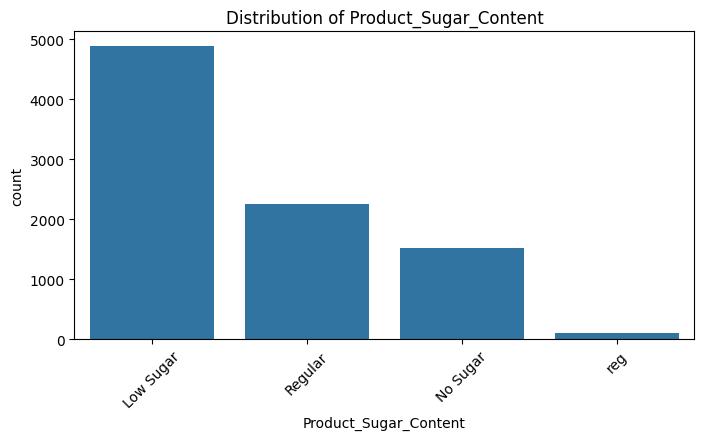

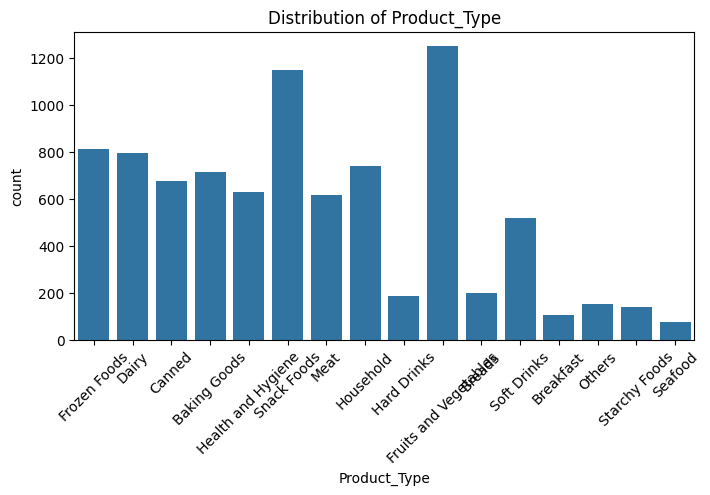

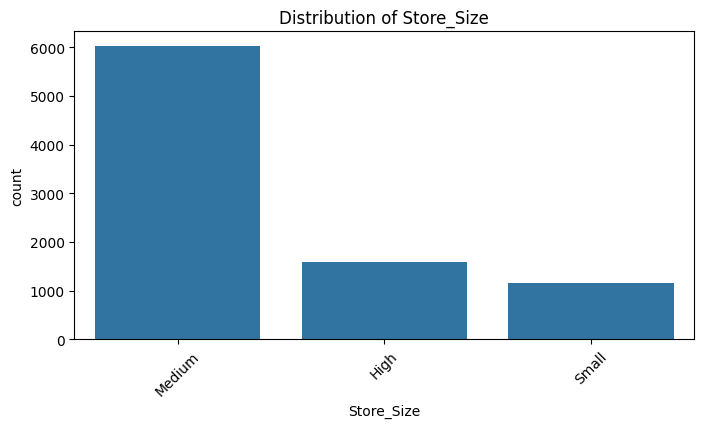

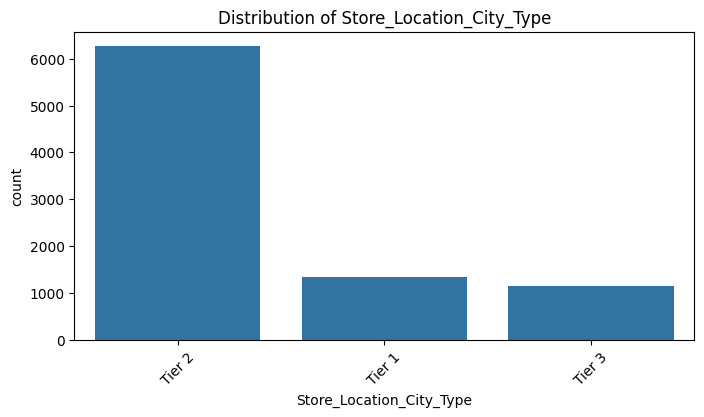

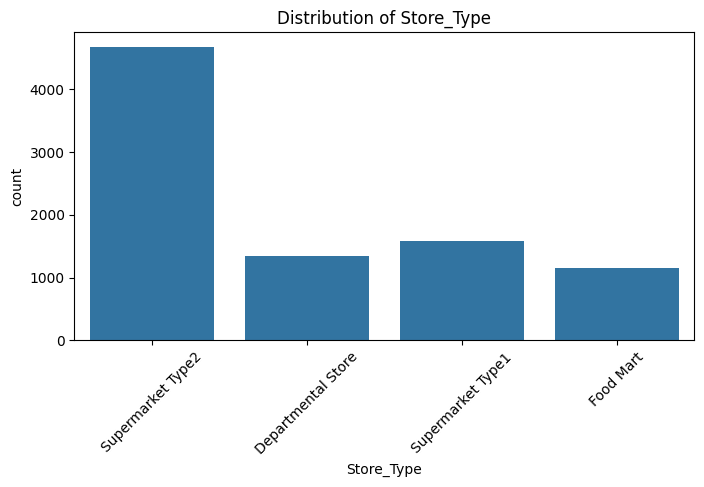

In [56]:
#For Categorical
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

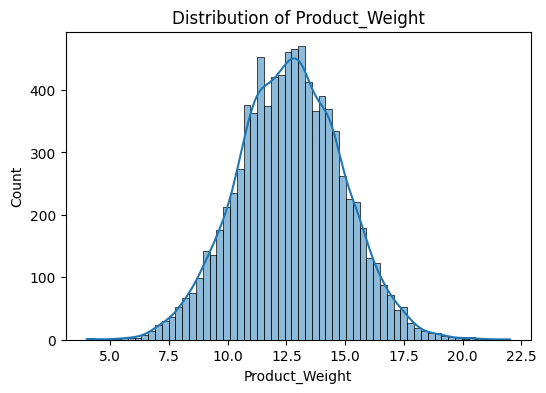

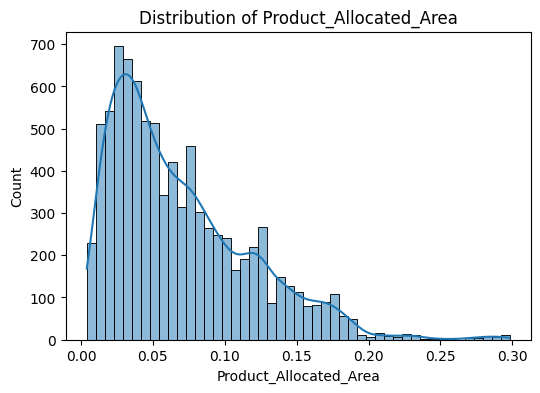

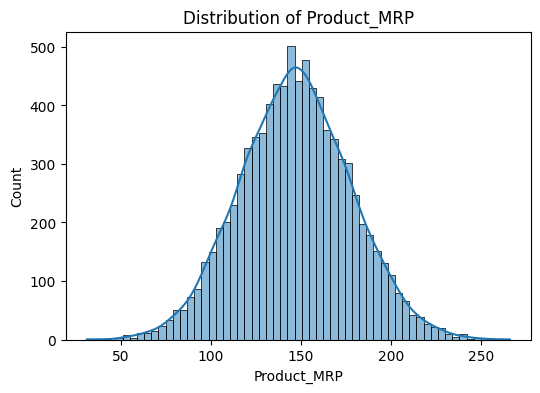

In [15]:
#For Numerical
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# **Bivariate Analysis**

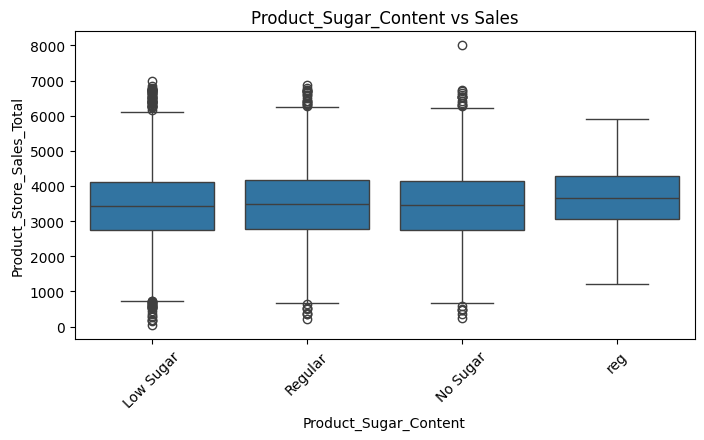

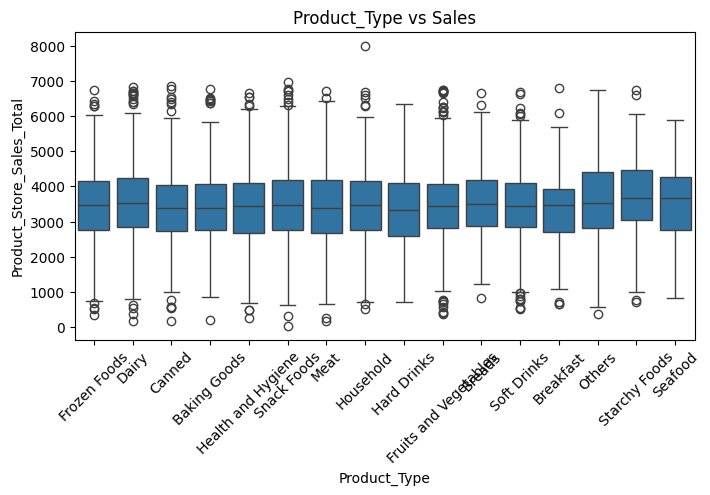

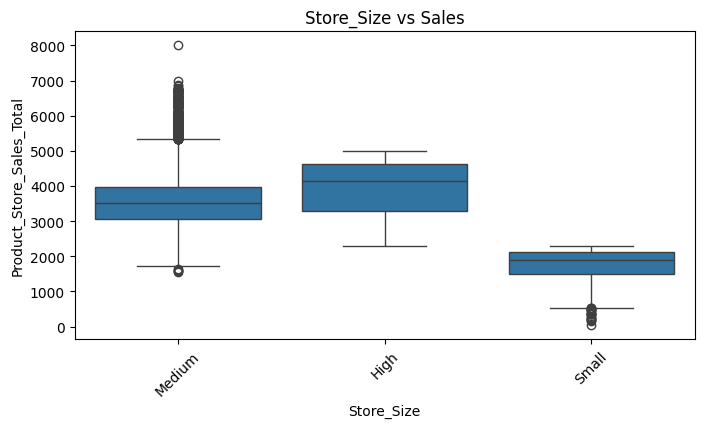

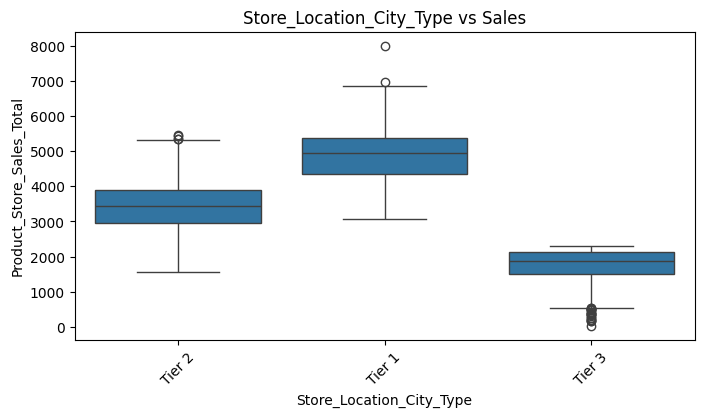

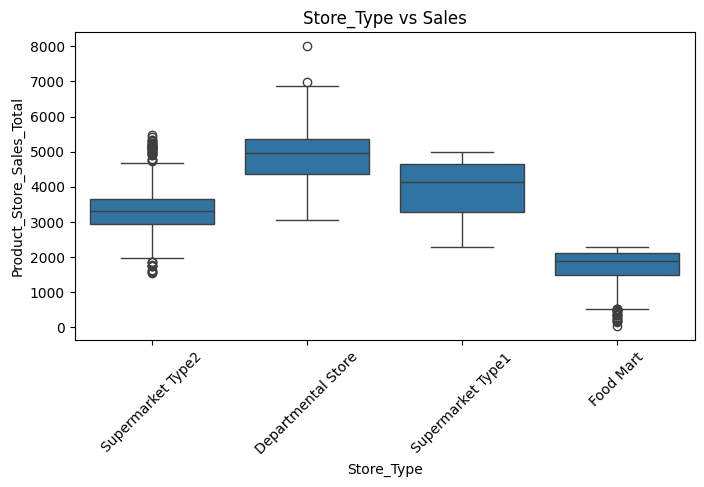

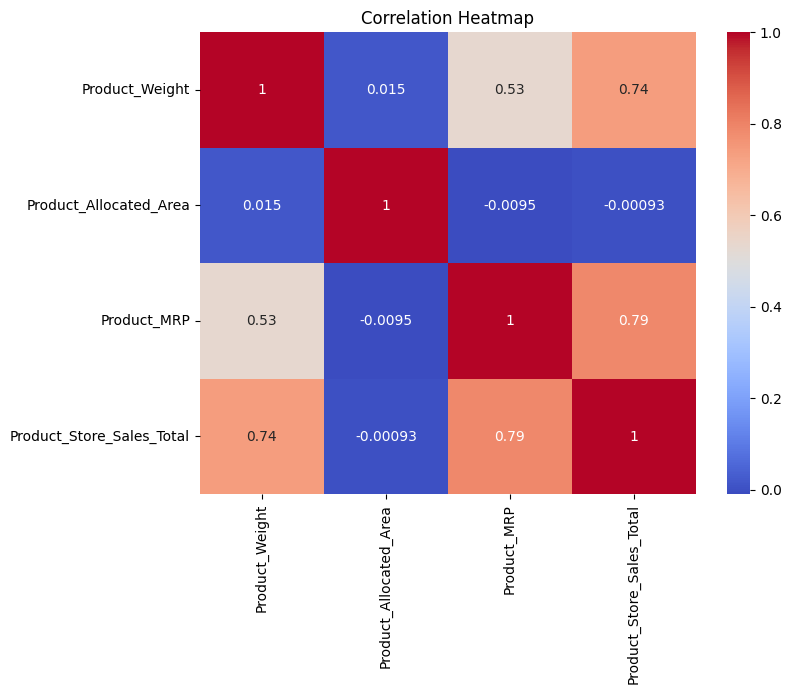

In [38]:
# Relationship with target
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='Product_Store_Sales_Total', data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Sales')
    plt.show()

# Correlation between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols + ['Product_Store_Sales_Total']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# **Multivariate Analysis**

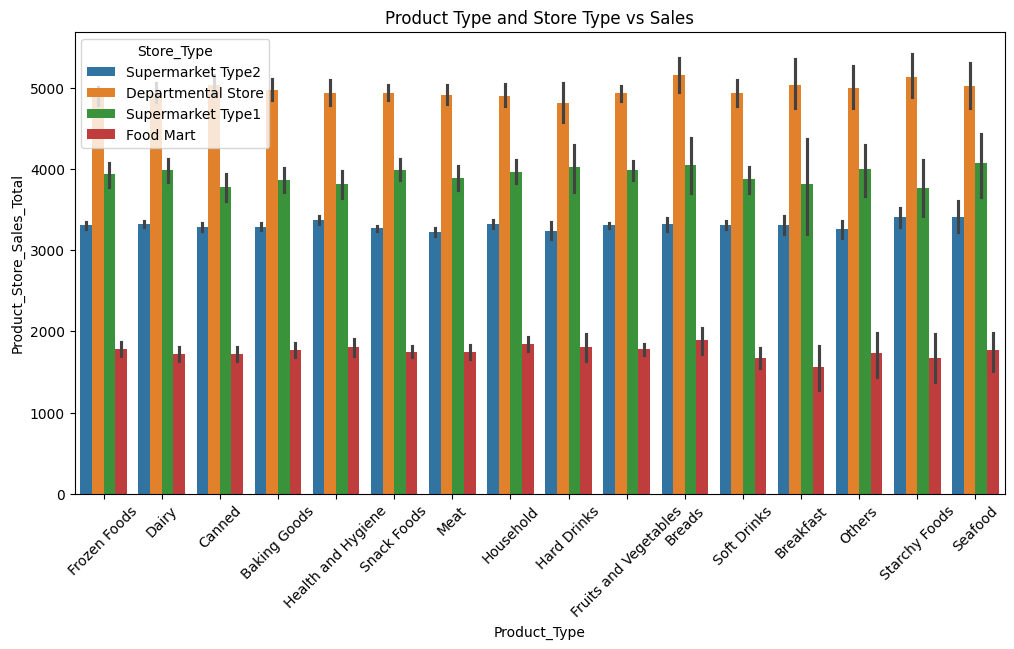

In [39]:
# Sales by Product Type and Store Type
plt.figure(figsize=(12, 6))
sns.barplot(x="Product_Type", y="Product_Store_Sales_Total", hue="Store_Type", data=df)
plt.xticks(rotation=45)
plt.title("Product Type and Store Type vs Sales")
plt.show()


# **Feature Engineering**

In [70]:
# Feature Engineering
df['Store_Age'] = 2025 - df['Store_Establishment_Year']

# Drop IDs
df.drop(['Product_Id', 'Store_Id', 'Store_Establishment_Year'], axis=1, inplace=True)

df['City_Tier_Original'] = df['Store_Location_City_Type']


# Encode categorical variables
label_enc = LabelEncoder()
df['Product_Sugar_Content'] = label_enc.fit_transform(df['Product_Sugar_Content'])
df['Store_Size'] = label_enc.fit_transform(df['Store_Size'])

# One-hot encoding
df = pd.get_dummies(df, columns=['Product_Type', 'Store_Location_City_Type', 'Store_Type'], drop_first=True)



KeyError: 'Store_Establishment_Year'

In [58]:
df.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Size,Product_Store_Sales_Total,Store_Age,City_Tier_Original,Product_Type_Breads,Product_Type_Breakfast,...,Product_Type_Others,Product_Type_Seafood,Product_Type_Snack Foods,Product_Type_Soft Drinks,Product_Type_Starchy Foods,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2
0,12.66,0,0.027,117.08,1,2842.40,16,Tier 2,False,False,...,False,False,False,False,False,True,False,False,False,True
1,16.54,0,0.144,171.43,1,4830.02,26,Tier 1,False,False,...,False,False,False,False,False,False,False,False,False,False
2,14.28,2,0.031,162.08,0,4130.16,38,Tier 2,False,False,...,False,False,False,False,False,True,False,False,True,False
3,12.10,0,0.112,186.31,0,4132.18,38,Tier 2,False,False,...,False,False,False,False,False,True,False,False,True,False
4,9.57,1,0.010,123.67,2,2279.36,27,Tier 3,False,False,...,False,False,False,False,False,False,True,True,False,False


# **Model**

In [71]:
# Define features and target
X = df.drop("Product_Store_Sales_Total", axis=1)
y = df["Product_Store_Sales_Total"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using OneHotEncoder or pandas get_dummies
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# **PCA + Random Forest**

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Apply PCA (preserve 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Split and train
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train model
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Evaluate
y_pred_pca = rf_pca.predict(X_test_pca)
print("R² with PCA:", r2_score(y_test, y_pred_pca))


R² with PCA: 0.9333860831492203


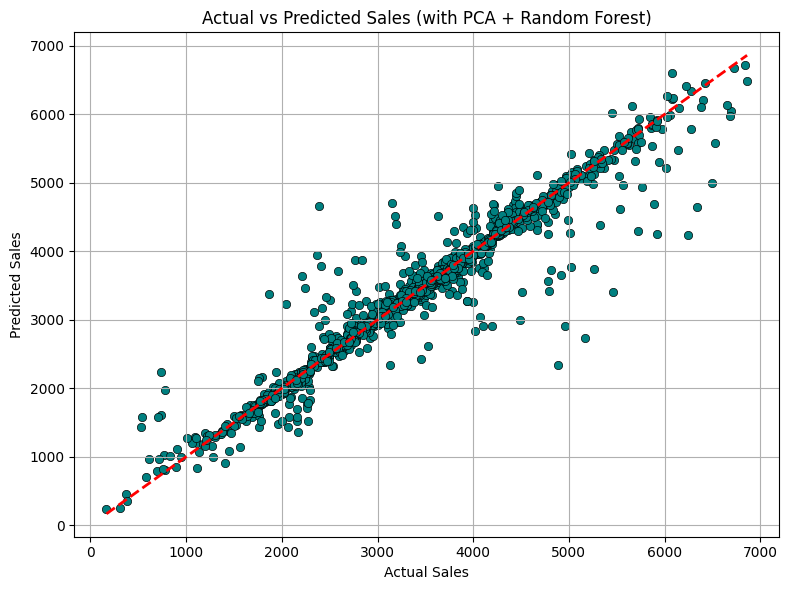

R² Score: 0.9333860831492203
RMSE: 275.695141411901


In [67]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_pca, color='teal', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # ideal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (with PCA + Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation metrics
r2 = r2_score(y_test, y_pred_pca)
mse = mean_squared_error(y_test, y_pred_pca)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("RMSE:", rmse)


# **Random Forest**

In [73]:

# Train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))



R² Score: 0.9289
RMSE: 284.75
MAE: 108.0


In [75]:
X = pd.get_dummies(X, drop_first=True)

X = X.reindex(columns=X_train.columns, fill_value=0)

df['Predicted_Sales'] = rf.predict(X)


In [76]:
# Average predicted sales by city tier
city_tier_summary = df.groupby('City_Tier_Original')['Predicted_Sales'].mean().reset_index()

print("Average Predicted Sales by City Tier:")
print(city_tier_summary)

Average Predicted Sales by City Tier:
  City_Tier_Original  Predicted_Sales
0             Tier 1      4933.214731
1             Tier 2      3458.747804
2             Tier 3      1761.501631


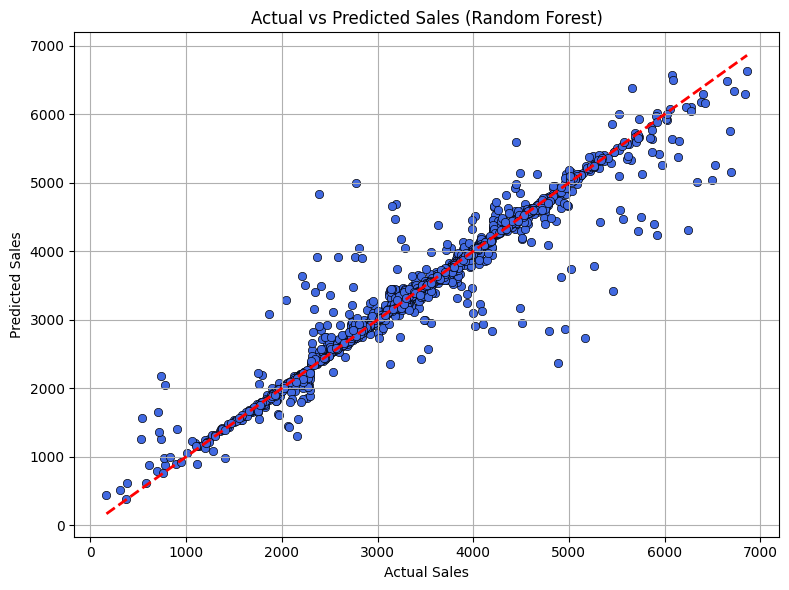

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


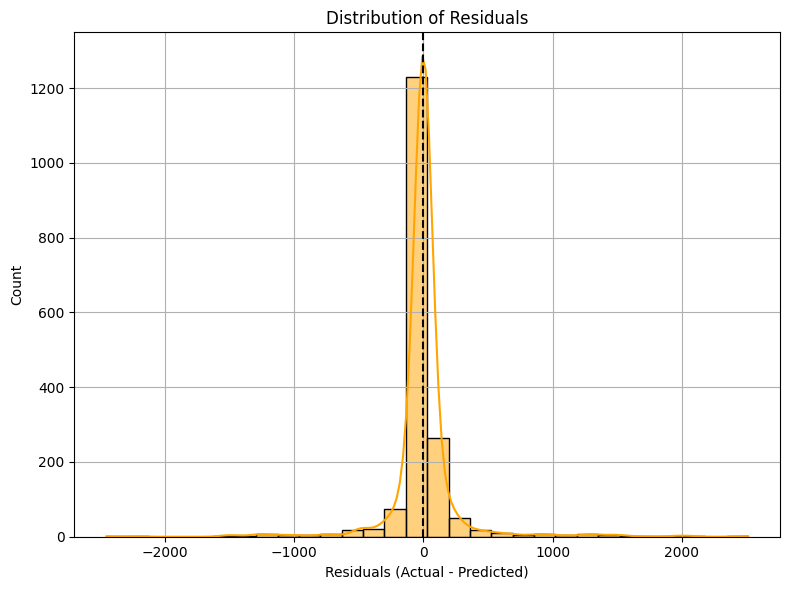

In [25]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()


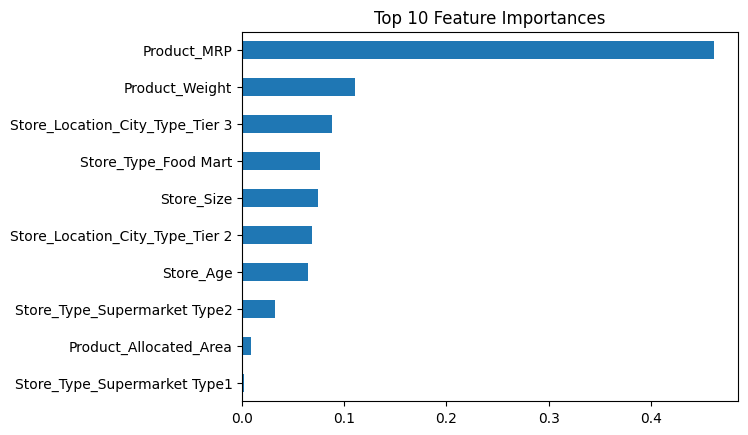

In [ ]:
# Feature Importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


<Axes: title={'center': 'Correlation Heatmap for the Features'}>

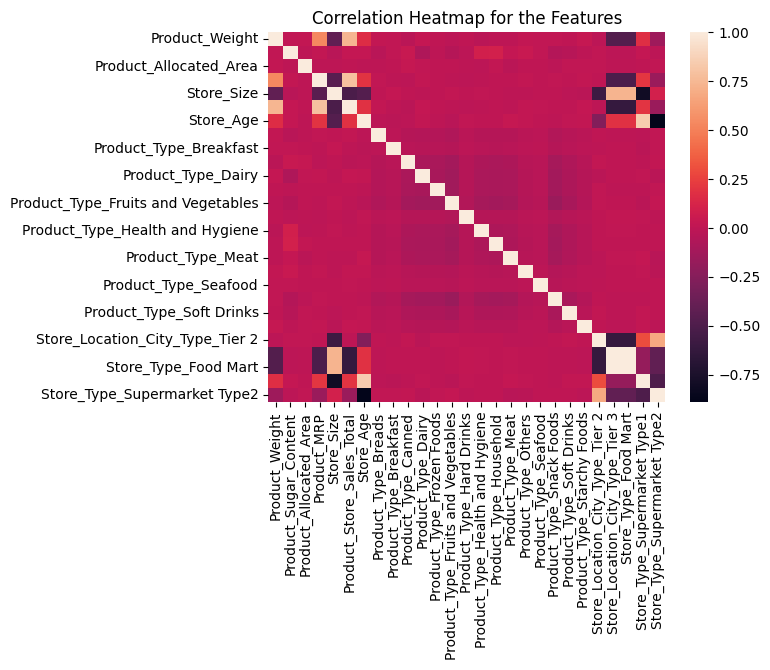

In [ ]:

plt.title('Correlation Heatmap for the Features')
sns.heatmap(df.corr())